# Workshop #5. Basics of `scanpy`

Firstly, let's install necessary Python packages.

In [ ]:
!pip install scanpy[leiden] scrublet
!gdown "1Ctq4EmV2ps1dMiFcbqW467ywezRSGGN0&confirm=t"
!unzip PBMC_10k.zip

## AnnData

In [ ]:
import scanpy as sc
import seaborn as sns
import numpy as np

# `verbosity = 3` means show every log message
sc.settings.verbosity = 3

In [ ]:
# Reading the dataset

adata = sc.read_10x_h5("filtered_feature_bc_matrix.h5")

reading filtered_feature_bc_matrix.h5
 (0:00:01)


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
# Make gene names unique

adata.var_names_make_unique()

In [ ]:
# Expression matrix

adata.X

<11996x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 27164608 stored elements in Compressed Sparse Row format>

In [ ]:
# Sparse to dense matrix transformation

adata.X.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Dense to sparse matrix transformation

from scipy.sparse import csr_matrix

X = np.array([[0, 1], [0, 0]])
X

array([[0, 1],
       [0, 0]])

In [ ]:
X_sparse = csr_matrix(X)
X_sparse

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [ ]:
# How to create AnnData manually

my_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
my_adata = sc.AnnData(X=my_matrix)

my_adata

AnnData object with n_obs × n_vars = 3 × 3

In [ ]:
# DataFrame with cells' annotation
adata.obs

""
AAACCCAAGGCCCAAA-1
AAACCCAAGTAATACG-1
AAACCCAAGTCACACT-1
AAACCCACAAAGCGTG-1
AAACCCACAATCGAAA-1
...
TTTGTTGGTTGGATCT-1
TTTGTTGGTTTCTTAC-1
TTTGTTGTCCATTTCA-1
TTTGTTGTCTACACAG-1


In [ ]:
adata.obs["tissue"] = "PBMC"
adata.obs

,tissue
AAACCCAAGGCCCAAA-1,PBMC
AAACCCAAGTAATACG-1,PBMC
AAACCCAAGTCACACT-1,PBMC
AAACCCACAAAGCGTG-1,PBMC
AAACCCACAATCGAAA-1,PBMC
...,...
TTTGTTGGTTGGATCT-1,PBMC
TTTGTTGGTTTCTTAC-1,PBMC
TTTGTTGTCCATTTCA-1,PBMC
TTTGTTGTCTACACAG-1,PBMC


In [ ]:
# Categorical Series

adata.obs["tissue"] = adata.obs.tissue.astype("category")
adata.obs.tissue

AAACCCAAGGCCCAAA-1    PBMC
AAACCCAAGTAATACG-1    PBMC
AAACCCAAGTCACACT-1    PBMC
AAACCCACAAAGCGTG-1    PBMC
AAACCCACAATCGAAA-1    PBMC
                      ... 
TTTGTTGGTTGGATCT-1    PBMC
TTTGTTGGTTTCTTAC-1    PBMC
TTTGTTGTCCATTTCA-1    PBMC
TTTGTTGTCTACACAG-1    PBMC
TTTGTTGTCTCATTAC-1    PBMC
Name: tissue, Length: 11996, dtype: category
Categories (1, object): ['PBMC']

In [ ]:
# DataFrame with genes' annotation

del adata.var["genome"], adata.var["feature_types"]
adata.var["mt"] = adata.var.index.str.startswith("MT-")
adata.var

,gene_ids,mt
MIR1302-2HG,ENSG00000243485,False
FAM138A,ENSG00000237613,False
OR4F5,ENSG00000186092,False
AL627309.1,ENSG00000238009,False
AL627309.3,ENSG00000239945,False
...,...,...
AC141272.1,ENSG00000277836,False
AC023491.2,ENSG00000278633,False
AC007325.1,ENSG00000276017,False
AC007325.4,ENSG00000278817,False


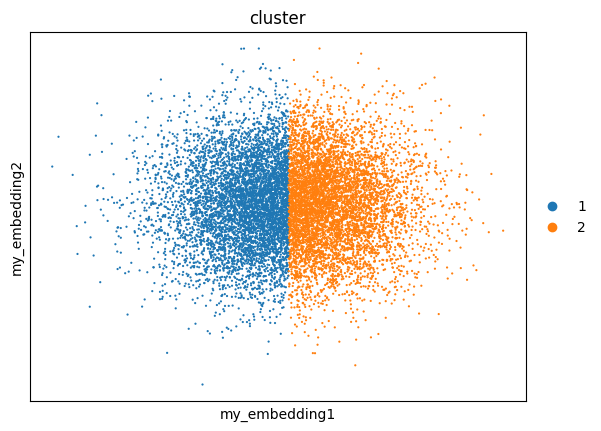

In [ ]:
# Embeddings plotting

adata.obsm["my_embedding"] = np.random.normal(size=(11996, 2))
adata.obs["cluster"] = ["1" if i else "2" for i in (adata.obsm["my_embedding"][:, 0] < 0)]

sc.pl.embedding(adata, basis="my_embedding", color="cluster")

In [ ]:
# Subselection in AnnData objects

adata[["TTTGTTGTCTCATTAC-1", "TTTGTTGGTTGGATCT-1"], ["CD4", "CD8A"]]

View of AnnData object with n_obs × n_vars = 2 × 2
    obs: 'tissue', 'cluster'
    var: 'gene_ids', 'mt'
    uns: 'tissue_colors', 'cluster_colors'
    obsm: 'my_embedding'

In [ ]:
# Layers in AnnData object

adata.layers["counts"] = adata.X.copy()
adata.layers["counts"]

<11996x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 27164608 stored elements in Compressed Sparse Row format>

In [ ]:
# Saving AnnData object

adata.write_h5ad("adata.h5ad")

## Diagnostic plots for cells' QC

<Axes: ylabel='Count'>

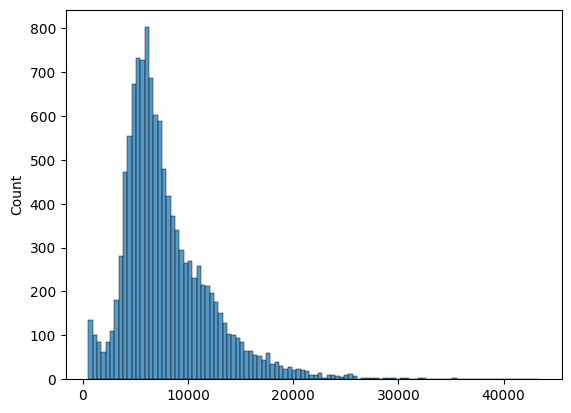

In [ ]:
# UMI per cell distribution

counts_per_cell = adata.X.sum(axis=1).A.T[0]
sns.histplot(counts_per_cell)

<Axes: ylabel='Count'>

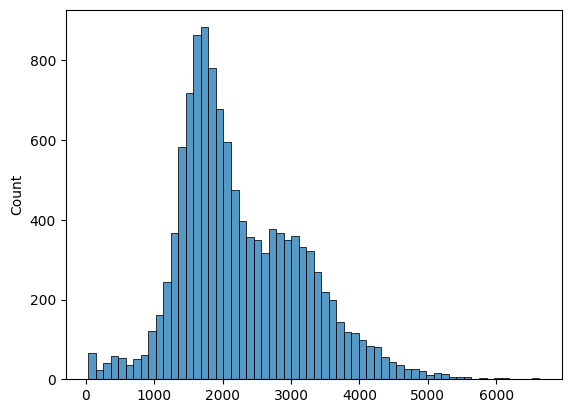

In [ ]:
# Number of genes per cell distribution

genes_per_cell = (adata.X > 0).sum(axis=1).T.A[0]
sns.histplot(genes_per_cell)

<Axes: ylabel='Count'>

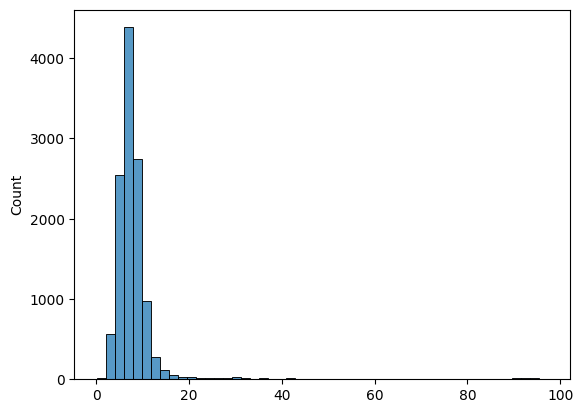

In [ ]:
# % of mitochondrial expression per each cell distribution

mito_counts = adata[:, adata.var["mt"]].X.sum(axis=1).T.A[0]
mito_pct = mito_counts / counts_per_cell * 100
sns.histplot(mito_pct, bins=50)

# Hometask

## Task 1

Number of UMIs per cell in the dataset is distributed (approximately) bimodally. What is the reason for that? Please provide some papers and/or resourses when this phenomenon is described.

Бимодальное распределение количества UMI на ячейку в наборе данных может быть обусловлено несколькими факторами, связанными с процессом секвенирования и обработкой данных. Одной из основных причин такого распределения является наличие шума или фонового сигнала, который смешивается с реальными данными о клетках. Это может происходить из-за случайных совпадений баркодов или присутствия нежелательных молекул в образцах.

В контексте анализа данных с использованием технологий одноклеточной секвенирования, таких как те, что предлагаются компанией 10x Genomics, бимодальное распределение часто наблюдается при анализе количества UMI (Unique Molecular Identifiers) на ячейку. Левый пик в таком распределении обычно соответствует фону или шуму, в то время как правый пик представляет собой сигнал от реальных клеток. Этот феномен описывается в документации 10x Genomics, где указано, что идеально должно быть четкое разделение между тегами CMO (Cellular Indexing Tag) по количеству UMI, что позволяет отличать реальные клетки от фона

*   Документация 10x Genomics по анализу качества с использованием веб-сводки Cell Ranger.
*   Техническая заметка 10x Genomics по интерпретации файлов веб-сводки Cell Ranger Multi для одноклеточного 3' ГЭ с технологией Feature Barcode для мультиплексирования клеток.

## Task 2

Using [Cellxgene Portal](https://cellxgene.cziscience.com/) please select the dataset of your scientific interest and perform QC. Are you happy with it? Please save files in `loom` format and describe the features of such a format.

In [ ]:
pip install cellxgene loompy
import cellxgene as cxg

adata = cxg.read('example_dataset.h5ad')
threshold = 1000
adata = adata[:, adata.X.sum(axis=1) > threshold]

import loompy

loom_file_path = 'processed_dataset.loom'

with loompy.create(loom_file_path, adata.shape[1], adata.var_names.values) as ds:
    # Write genes
    ds.genes = adata.var_names.values
    # Write cells
    ds.cells = adata.obs.index
    # Write expression matrix
    ds.matrix = adata.X.todense()
    # Optionally, write additional annotations
    ds.layers['normalized'] = adata.X.norm().todense()